<a href="https://colab.research.google.com/github/parmidamardi/CDM-TA-3/blob/main/CDM_TA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
np.random.seed(42)

A = np.array([
    [1, 2.0],
    [1, 3.0],
    [1, 4.5],
    [1, 5.5]
])

y = np.array([
    [3.1],
    [4.9],
    [8.2],
    [10.1]
])

m = len(y)

In [47]:
#step 1.1
AtA = A.T @ A
AtA_inv = np.linalg.inv(AtA)
Aty = A.T @ y
theta = AtA_inv @ Aty

print("Theta:\n", theta)

Theta:
 [[-1.04137931]
 [ 2.03103448]]


In [48]:
#step 1.2: BGD
learning_rate = 0.01
n_iterations = 1000

theta_bgd = np.zeros((2,1))
for i in range(n_iterations):
    gradient = (1/m) * A.T @ (A @ theta_bgd - y)
    theta_bgd = theta_bgd - learning_rate * gradient
print("Theta from BGD:\n", theta_bgd)

Theta from BGD:
 [[-0.55217831]
 [ 1.9146829 ]]


In [49]:
#Own test: increasing the number of iterations
learning_rate = 0.01
n_iterations = 5000

theta_bgd_test = np.zeros((2,1))
for i in range(n_iterations):
    gradient = (1/m) * A.T @ (A @ theta_bgd_test - y)
    theta_bgd_test = theta_bgd_test - learning_rate * gradient
print("Theta from BGD with :\n", theta_bgd_test)

Theta from BGD with :
 [[-1.03491408]
 [ 2.02949679]]


In [50]:
#step 1.3
U, S, VT = np.linalg.svd(A, full_matrices=False)
S_inv = np.diag(1 / S)
A_pseudo_inv = VT.T @ S_inv @ U.T
theta_svd = A_pseudo_inv @ y
print("Theta from SVD pseudoinverse:\n", theta_svd)


Theta from SVD pseudoinverse:
 [[-1.04137931]
 [ 2.03103448]]


In [51]:
#step 1.4
noise = np.random.rand(m, 1) * 0.0001
A_collinear = np.hstack((A, A[:, [1]] + noise))

In [52]:
AtA = A_collinear.T @ A_collinear
AtA_inv = np.linalg.inv(AtA)
Aty = A_collinear.T @ y
theta_normal_col = AtA_inv @ Aty

print("Theta:\n", theta_normal_col)

Theta:
 [[-8.53782625e-01]
 [ 3.43827452e+03]
 [-3.43623267e+03]]


In [53]:
U, S, VT = np.linalg.svd(A_collinear, full_matrices=False)
S_inv = np.diag(1 / S)
A_pseudo_inv = VT.T @ S_inv @ U.T
theta_svd_col = A_pseudo_inv @ y
print("Theta from SVD pseudoinverse:\n", theta_svd_col)

Theta from SVD pseudoinverse:
 [[-8.53775599e-01]
 [ 3.43826298e+03]
 [-3.43622113e+03]]


In [54]:
#step 2.1
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = [
    'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
    'Acceleration', 'ModelYear', 'Origin', 'CarName'
]

data_mpg = pd.read_csv(
    url,
    names=column_names,
    na_values='?',
    delim_whitespace=True
)

data_mpg = data_mpg.dropna(subset=['Horsepower'])

data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)

data_mpg.head()


/tmp/ipython-input-1375130659.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,CarName
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [55]:
#step 2.2
hp = data_mpg['Horsepower'].values.reshape(-1, 1)
mpg = data_mpg['MPG'].values.reshape(-1, 1)

ones = np.ones((len(hp), 1))
A = np.hstack([ones, hp])

y = mpg

print("A shape:", A.shape)
print("y shape:", y.shape)

A shape: (392, 2)
y shape: (392, 1)


In [56]:
# Normalize only the Horsepower column - Z-score normalization
hp_mean = np.mean(A[:, 1])
hp_std = np.std(A[:, 1])

A_norm = A.copy()
A_norm[:, 1] = (A[:, 1] - hp_mean) / hp_std

print("Mean after normalization:", A_norm[:, 1].mean())
print("Std after normalization:", A_norm[:, 1].std())

Mean after normalization: -1.812609019796174e-16
Std after normalization: 0.9999999999999998


In [57]:
#step 2.3
#used for 2.3.3
def compute_cost(A, y, theta):
    m = len(y)
    residual = A @ theta - y
    return (1/(2*m)) * np.sum(residual**2)

In [58]:
#2.3.1
def stochastic_gradient_descent(A, y, learning_rate=0.01, n_iterations=5000):
    m, n = A.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for t in range(n_iterations):
        i = np.random.randint(m)
        Ai = A[i, :].reshape(1, -1)
        yi = y[i].reshape(1, 1)

        gradient_i = Ai.T @ (Ai @ theta - yi)
        theta = theta - learning_rate * gradient_i

        cost_history.append(compute_cost(A, y, theta))

    return theta, cost_history

In [59]:
#2.3.2
def batch_gradient_descent(A, y, learning_rate=0.01, n_iterations=1000):
    m, n = A.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for t in range(n_iterations):
        gradient = (1/m) * (A.T @ (A @ theta - y))
        theta = theta - learning_rate * gradient

        cost_history.append(compute_cost(A, y, theta))

    return theta, cost_history

In [60]:
theta_sgd, cost_sgd = stochastic_gradient_descent(A_norm, y,
                                                  learning_rate=0.01,
                                                  n_iterations=5000)

theta_bgd, cost_bgd = batch_gradient_descent(A_norm, y,
                                             learning_rate=0.01,
                                             n_iterations=1000)

print("Theta (SGD):\n", theta_sgd)
print("Theta (BGD):\n", theta_bgd)

Theta (SGD):
 [[22.5832758 ]
 [-6.51916008]]
Theta (BGD):
 [[23.44490618]
 [-6.06761045]]


In [61]:
#step 2.4

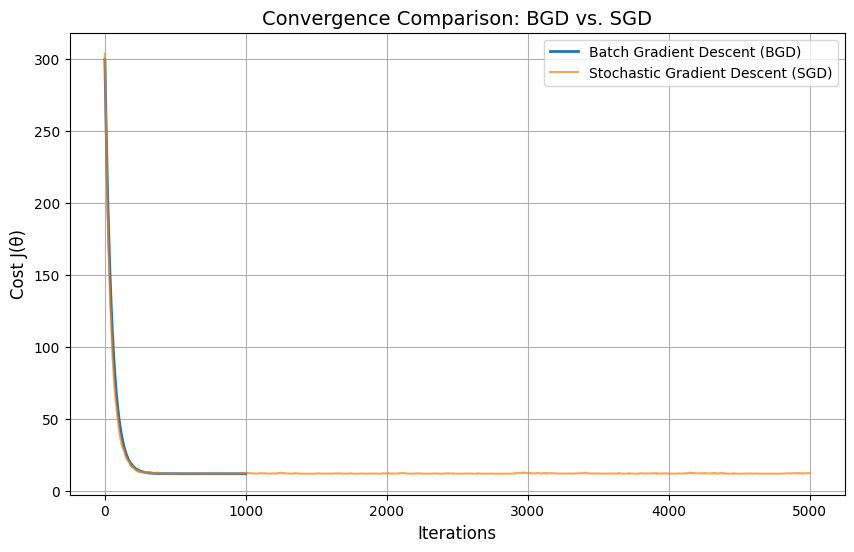

In [62]:
#2.4.1
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.plot(cost_bgd, label="Batch Gradient Descent (BGD)", linewidth=2)
plt.plot(cost_sgd, label="Stochastic Gradient Descent (SGD)", alpha=0.7)

plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Cost J(θ)", fontsize=12)
plt.title("Convergence Comparison: BGD vs. SGD", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

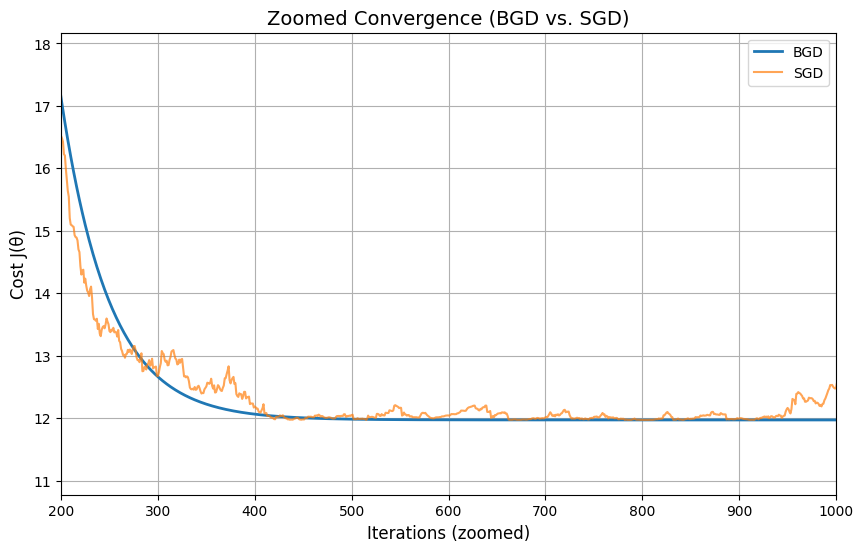

In [63]:
#Zoomed in to have a better insight
plt.figure(figsize=(10,6))

plt.plot(cost_bgd, label="BGD", linewidth=2)
plt.plot(cost_sgd, label="SGD", alpha=0.7)

plt.xlim(200, 1000)
plt.ylim(min(cost_sgd[200:1000])*0.9,
         max(cost_sgd[200:1000])*1.1)

plt.xlabel("Iterations (zoomed)", fontsize=12)
plt.ylabel("Cost J(θ)", fontsize=12)
plt.title("Zoomed Convergence (BGD vs. SGD)", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()